In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

file_path = Path("spam.csv")
df = pd.read_csv(file_path, encoding="latin-1")

In [ ]:

df = df.iloc[:, [0, 1]]
df.columns = ["label", "message"]

In [4]:
df.dropna(inplace=True)

In [ ]:

df["label"] = df["label"].map({"ham": 0, "spam": 1})

In [ ]:

df["sms_length"] = df["message"].apply(len)

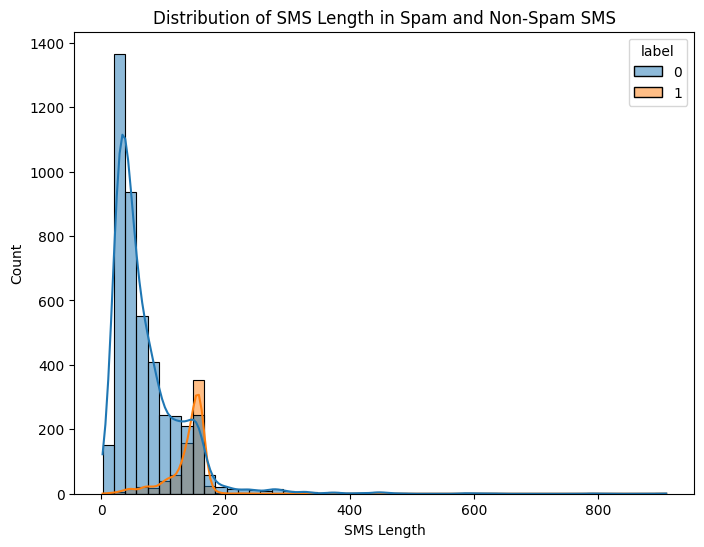

In [ ]:

if not df.empty:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x="sms_length", hue="label", bins=50, kde=True)
    plt.title("Distribution of SMS Length in Spam and Non-Spam SMS")
    plt.xlabel("SMS Length")
    plt.ylabel("Count")
    plt.show()

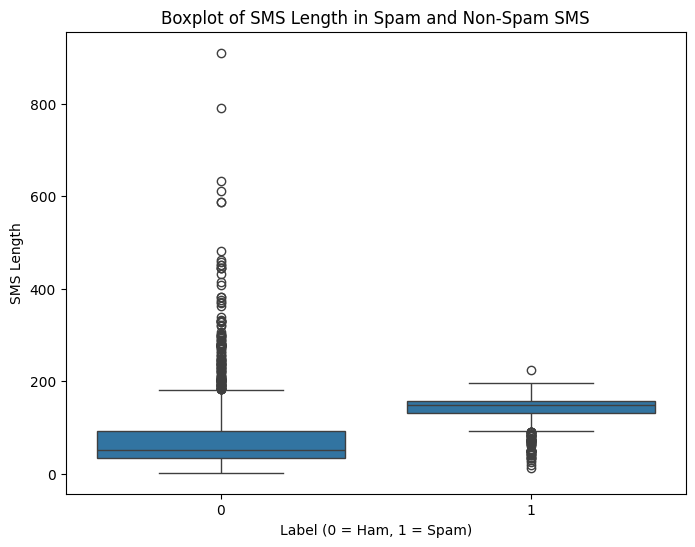

In [8]:

plt.figure(figsize=(8, 6))
sns.boxplot(x="label", y="sms_length", data=df)
plt.title("Boxplot of SMS Length in Spam and Non-Spam SMS")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("SMS Length")
plt.show()

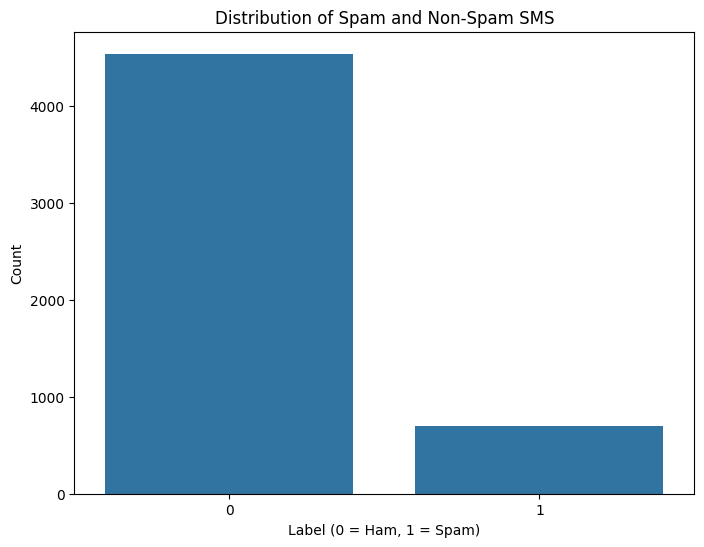

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=df)
plt.title("Distribution of Spam and Non-Spam SMS")
plt.xlabel("Label (0 = Ham, 1 = Spam)")
plt.ylabel("Count")
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    df["message"], df["label"], test_size=0.2, random_state=42, stratify=df["label"]
)

In [ ]:

vectorizer = TfidfVectorizer(ngram_range=(1, 3), stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:

model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced_subsample")
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_estimators=300,
                       random_state=42)

In [ ]:

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

In [14]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

In [ ]:

y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [17]:
print(f"✅ Model Training Completed. Accuracy: {accuracy:.4f}")
print(report)

✅ Model Training Completed. Accuracy: 0.9666
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       908
           1       1.00      0.75      0.86       139

    accuracy                           0.97      1047
   macro avg       0.98      0.87      0.92      1047
weighted avg       0.97      0.97      0.96      1047

